# Perceptron

References-

1. https://en.wikipedia.org/wiki/Perceptron
2. https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote03.html

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification

plt.style.use('seaborn')

%matplotlib inline

## Assumptions

- Binary Classification y = {-1, 1}
- Data is linearly Separable

In [2]:
X, y = make_classification(n_features=2, n_redundant=0, n_classes=2, class_sep=2,
                           n_clusters_per_class=1, random_state=69)

X.shape, y.shape

((100, 2), (100,))

In [3]:
y = np.where(y == 0, -1, 1) # to change classes from 0,1 to -1,1

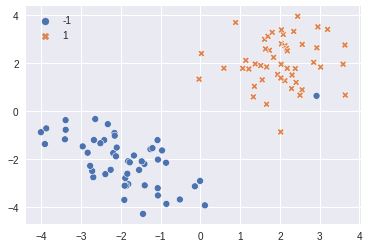

In [4]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, style=y, ax=ax, palette='deep')
plt.show()

looks like data is linearly separable.

## Classifier


$h(x_i) = sign(w^T x_i + b)$

\begin{align*} 
    x_i \rightarrow \begin{bmatrix}
        x_i \\
        1
    \end{bmatrix}\\
   w \rightarrow \begin{bmatrix}
       w \\
       b
   \end{bmatrix}
\end{align*}


if the data is shifted to center then b = 0

$h(x_i) = sign(w^T x_i)$

## Algorithm

> Initialize $\vec w$ = 0

> While True do

>> m = 0

>> for $(x_i, y_i) \in D$ do

>>> if $y_i \times (w^T x_i) \le 0$ then

>>>> $\vec{w} \leftarrow \vec{w} + y \times \vec{x}$

>>>> $m \leftarrow m + 1$

>>> end if

>> end for 

>> if m = 0 then

>>> break

>> end if

> end while


$y_i \times (w^T x_i) \gt 0$ means correctly classified sample

## Implementation

In [5]:
n_epochs = 10 # or inf

n_samples, n_features = X.shape
w = np.zeros((n_features))

for _ in range(n_epochs):
    m = 0
    for i in range(n_samples):
        if (y[i] * (w.T @ X[i])) <= 0: # misclassification        
            w = w + (y[i] * X[i])
            m = m + 1
            
    ## if this loop was while(infinite) then when the classifier perfectly fits 
    ## 0 misclassifications
    ## then m = 0 and it will break the loop
    if m == 0:
        break

In [6]:
y_pred = np.int32(np.sign(w @ X.T))

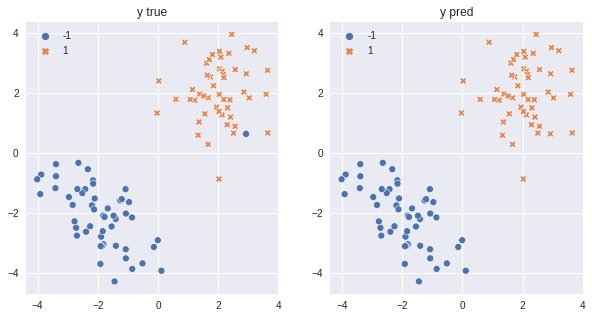

In [7]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, style=y, ax=ax, palette='deep')
ax.set_title("y true")

ax = fig.add_subplot(1,2,2)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y_pred, style=y_pred, ax=ax, palette='deep')
ax.set_title("y pred")

plt.show()

It matched most of the examples except one that is misclassified.

## Hyperplane

In [8]:
xx, yy = np.meshgrid(np.linspace(X.min(), X.max(), 100),np.linspace(X.min(), X.max(), 100))

mesh = np.c_[xx.ravel(), yy.ravel()]
mesh_pred = np.int32(np.sign(w @ mesh.T))

zz = mesh_pred.reshape(xx.shape)

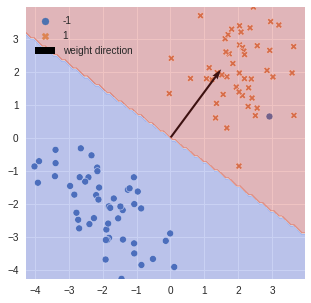

In [12]:
fig = plt.figure(figsize=(5, 5))

ax = fig.add_subplot(1, 1, 1)

sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, style=y, ax=ax, palette='deep')
ax.quiver(0, 0, w[0], w[1], scale=10, label='weight direction') # weight vector will always go through zero
ax.contourf(xx, yy, zz, cmap=plt.cm.coolwarm, alpha=0.3)

plt.legend()
plt.show()


## Intuition

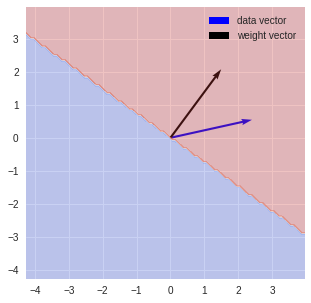

In [33]:
fig = plt.figure(figsize=(5, 5))

ax = fig.add_subplot(1, 1, 1)

ax.quiver(0, 0, X[35,0], X[35,1], color='b', scale=10, label='data vector') # weight vector will always go through zero
ax.quiver(0, 0, w[0], w[1], scale=10, label='weight vector') # weight vector will always go through zero
ax.contourf(xx, yy, zz, cmap=plt.cm.coolwarm, alpha=0.3)

plt.legend()
plt.show()
